In [38]:
import numpy as np
import pandas as pd
import ast
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

df = pd.read_csv('biosensing_data.csv')
# string to list
df['Microbial_Signature'] = df['Microbial_Signature'].apply(ast.literal_eval)
# list to separate columns
df_expanded = pd.DataFrame(df['Microbial_Signature'].tolist(), columns=['Feature1', 'Feature2', 'Feature3'])
label_encoder = LabelEncoder()
df['classification_label_number'] = label_encoder.fit_transform(df.iloc[:, -1])

X = df_expanded.values  # Convert dataframe to numpy array
y = df['classification_label_number'].values

# LDA
lda = LinearDiscriminantAnalysis()
X_proj = lda.fit_transform(X, y)

# Print transformed features
print("Transformed Features (Fisher Projection):\n", X_proj)

Transformed Features (Fisher Projection):
 [[ 0.72026634 -0.13540976  1.36565719]
 [-0.67838611 -0.36323551 -0.08087159]
 [ 0.04566598 -2.20782713 -0.35060249]
 ...
 [-1.41861714 -0.08411429 -1.34301164]
 [-1.45276821  0.27052216 -0.35893498]
 [-0.08243838 -0.27501094 -1.23315625]]


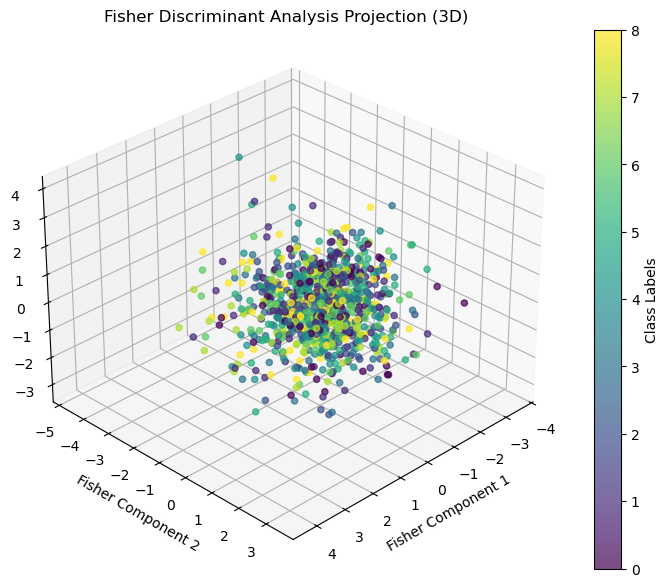

In [40]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(X_proj[:, 0], X_proj[:, 1], X_proj[:, 2], c=y, cmap='viridis', alpha=0.7)

# Labels
ax.set_xlabel("Fisher Component 1")
ax.set_ylabel("Fisher Component 2")
ax.set_zlabel("Fisher Component 3")
ax.set_title("Fisher Discriminant Analysis Projection (3D)")

ax.view_init(elev=30, azim=45)
#ax.view_init(elev=90, azim=45)
#ax.view_init(elev=90, azim=90)
#ax.view_init(elev=180, azim=90)
# Add color bar
plt.colorbar(sc, label="Class Labels")
plt.show()